__Import Library__

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

__Basic Preprocessing:__

_<b>Transform to convert images to tensors and normalize them<b>_

In [12]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,)) 
])

__Load the MNIST dataset with transformations applied__

In [13]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

__Load datasets into DataLoader__

In [18]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

__Function to display a batch of 25 images__

In [19]:
def show_batch(images, labels):
    fig, ax = plt.subplots(5, 5, figsize=(12, 12))  # 5x5 grid for 25 images
    ax = ax.flatten()  # Flatten the axes for easy iteration
    
    for i in range(25):  # Loop over the first 25 images
        ax[i].imshow(images[i].numpy().squeeze(), cmap='gray')
        ax[i].set_title(f'Label: {labels[i].item()}')
        ax[i].axis('off')  # Turn off axis labels and ticks
    
    plt.tight_layout()
    plt.show()

__Fetch a batch of data and display 25 images__

In [20]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

__Show the first 25 images from the batch__

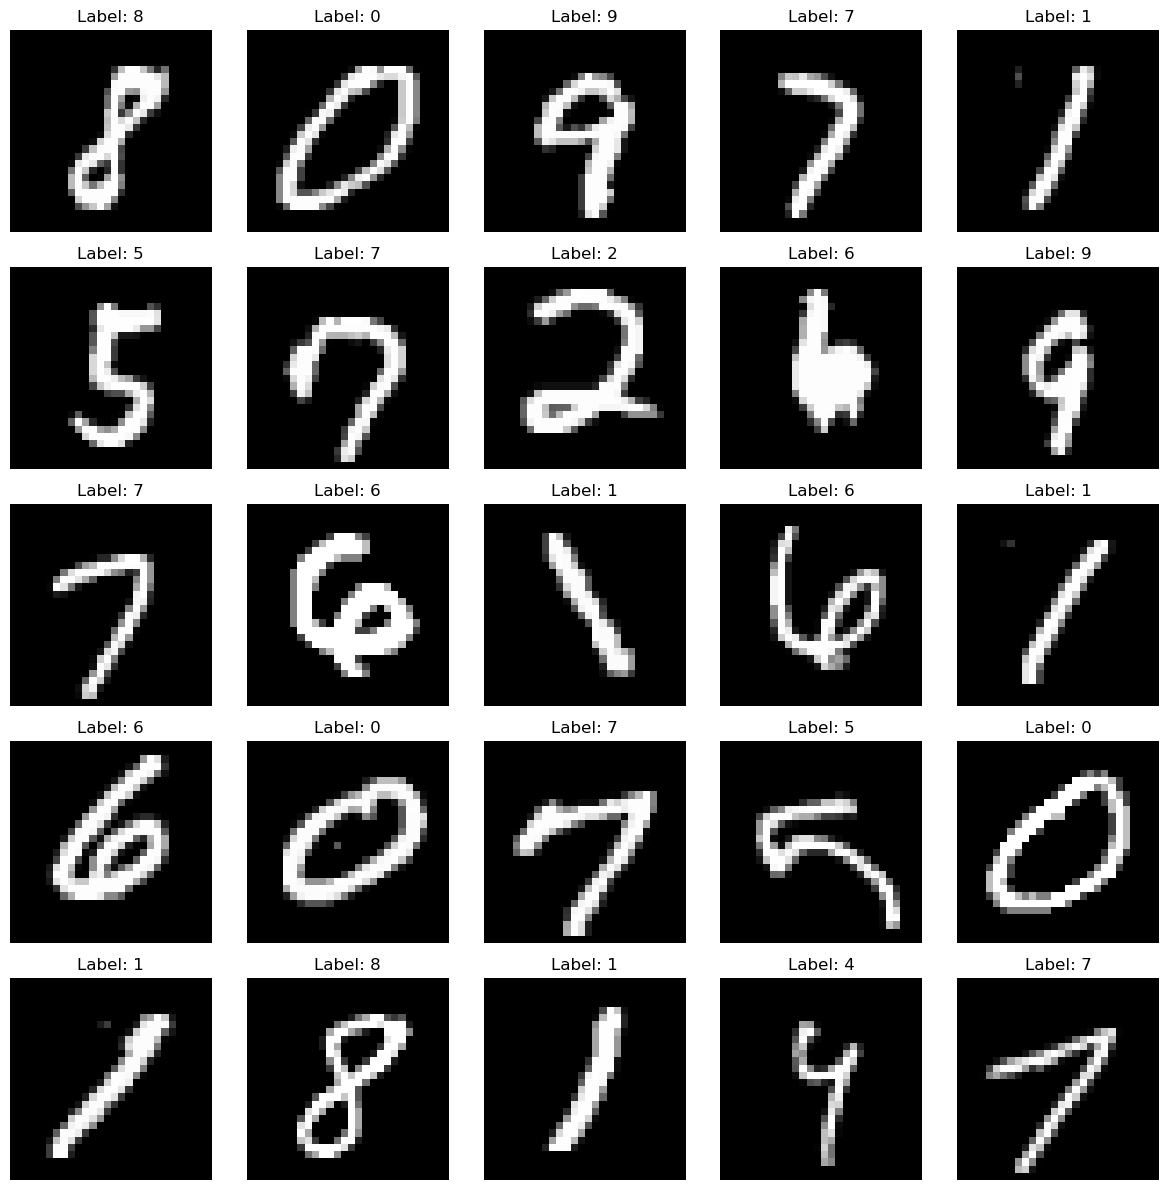

In [21]:
show_batch(images[:25], labels[:25])

__Advanced   Preprocessing   Techniques:__

$A. Data Augmentation:$

In [22]:
transform = transforms.Compose([
    transforms.RandomRotation(10),  
    transforms.RandomAffine(0, translate=(0.1, 0.1)),  
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

$B. Custom Transformation:$

In [23]:
def binarize_image(img):
    return img > 0.5 

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda img: binarize_image(img)),
    transforms.Normalize((0.1307,), (0.3081,))
])

$C. Resizing:$

In [24]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),  
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

$D. Flattening Images:$

In [25]:
class FlattenTransform:
    def __call__(self, img):
        return img.view(-1)  

transform = transforms.Compose([
    transforms.ToTensor(),
    FlattenTransform(),  
    transforms.Normalize((0.1307,), (0.3081,))
])


$E. Pixel Intensity Scaling:$

In [26]:
class ScalePixels:
    def __call__(self, img):
        return img * 255  

transform = transforms.Compose([
    transforms.ToTensor(),
    ScalePixels(),
    transforms.Normalize((0.1307,), (0.3081,))
])
